# Data augmentation for 1 coordinate systems


The aim of this notebook is to validate our implementation of data augmentation through rotation transformations around the X, Y and Z axis. As explained in our previous notebook, we perform a prior normalization step that translates the camera's coordinate system to a new coordinate system corresponding to the middle of the spine of the main subject. 

We demonstrate:

- The prior normalization step (translating from global to local coordinate system)
- The random rotation across X, Y and Z axis

In [1]:
%matplotlib notebook
import h5py
import numpy as np
import os
import random
import sys

from play_skeleton import *
from src.utils.joints import *
from src.models.data_augmentation import *

# Global variables (change depending on your setup)
project_dir = os.getcwd() + '/../'
h5_dataset_path = project_dir + "/data/processed/"
skeleton_dataset_file_name = "skeleton.h5"
log_file_name = "samples_names.txt"

## 1. Import random sample

In [2]:
# Sample names in a list (total of 56880 samples)
samples_names_list = [line.rstrip('\n') for line in open(h5_dataset_path + log_file_name)]

# Shuffle samples_names_list 
random.shuffle(samples_names_list)

# Take first random sample
sample_name = samples_names_list[0]

# Open dataset
dataset = h5py.File(h5_dataset_path + skeleton_dataset_file_name, 'r')

# Get sample : shape (3, max_frame, n_joints = 25, n_subjects = 2)
skeleton = dataset[sample_name]["skeleton"][:]


<IPython.core.display.Javascript object>


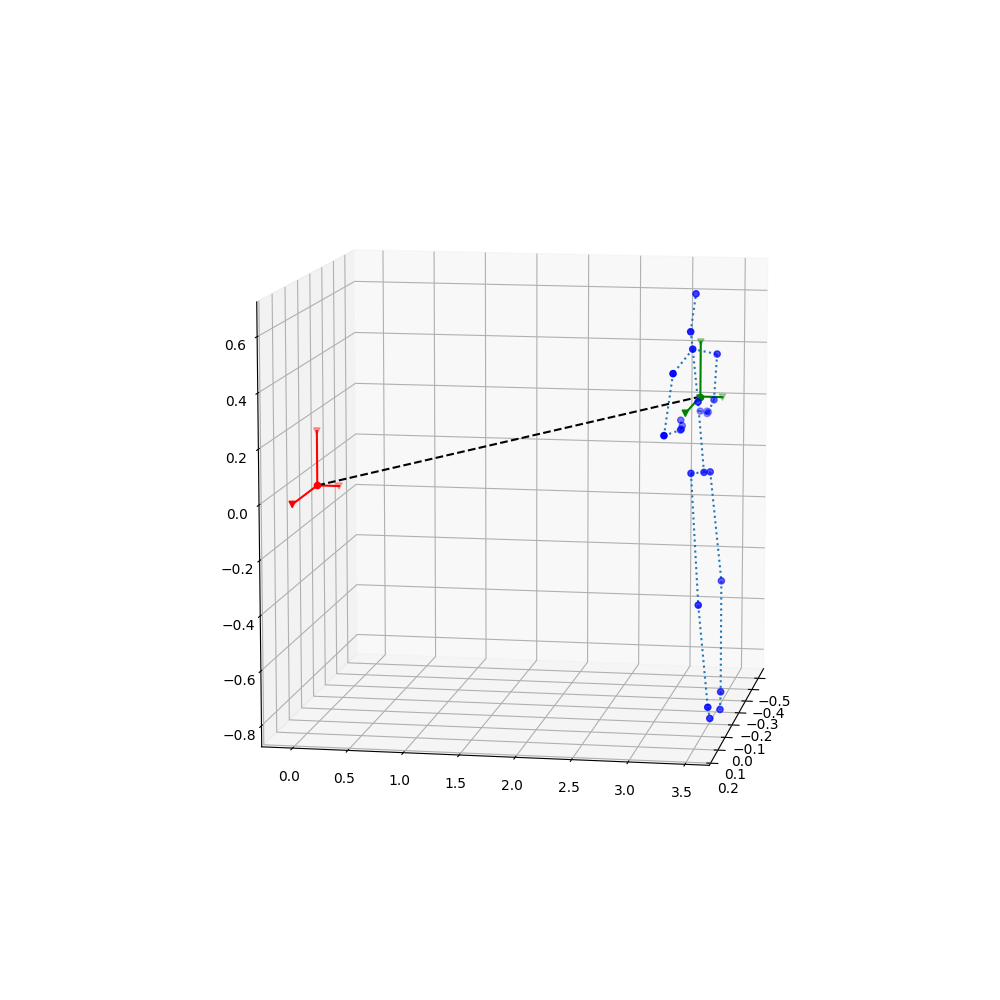

In [3]:
animateJointCoordinates(skeleton.transpose(3, 2, 0, 1)[0], connexion_tuples)

## 2. Perform prior normalization step (translation)

In [4]:
# Perform prior normalization step :
# -> Translate to torso of first subject at first frame for all frames
trans_vector = skeleton[:, 0, Joints.SPINEMID, :] # shape (3, 2)
trans_vector[:, 1] = trans_vector[:, 0]
skeleton = (skeleton.transpose(1, 2, 0, 3) - trans_vector).transpose(2, 0, 1, 3)

<IPython.core.display.Javascript object>


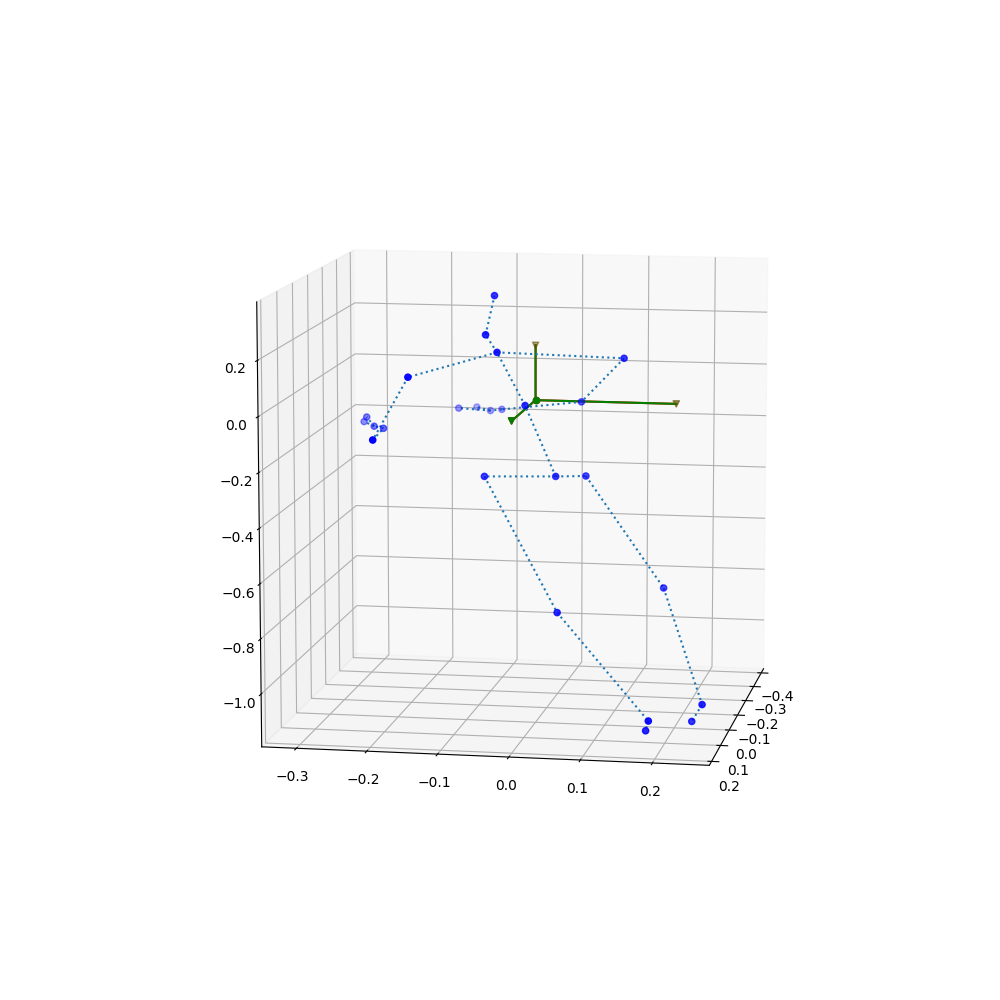

In [5]:
animateJointCoordinates(skeleton.transpose(3, 2, 0, 1)[0], connexion_tuples)

## 3. Apply random rotation

In [6]:
skeleton_aug = rotate_skeleton(skeleton)

<IPython.core.display.Javascript object>


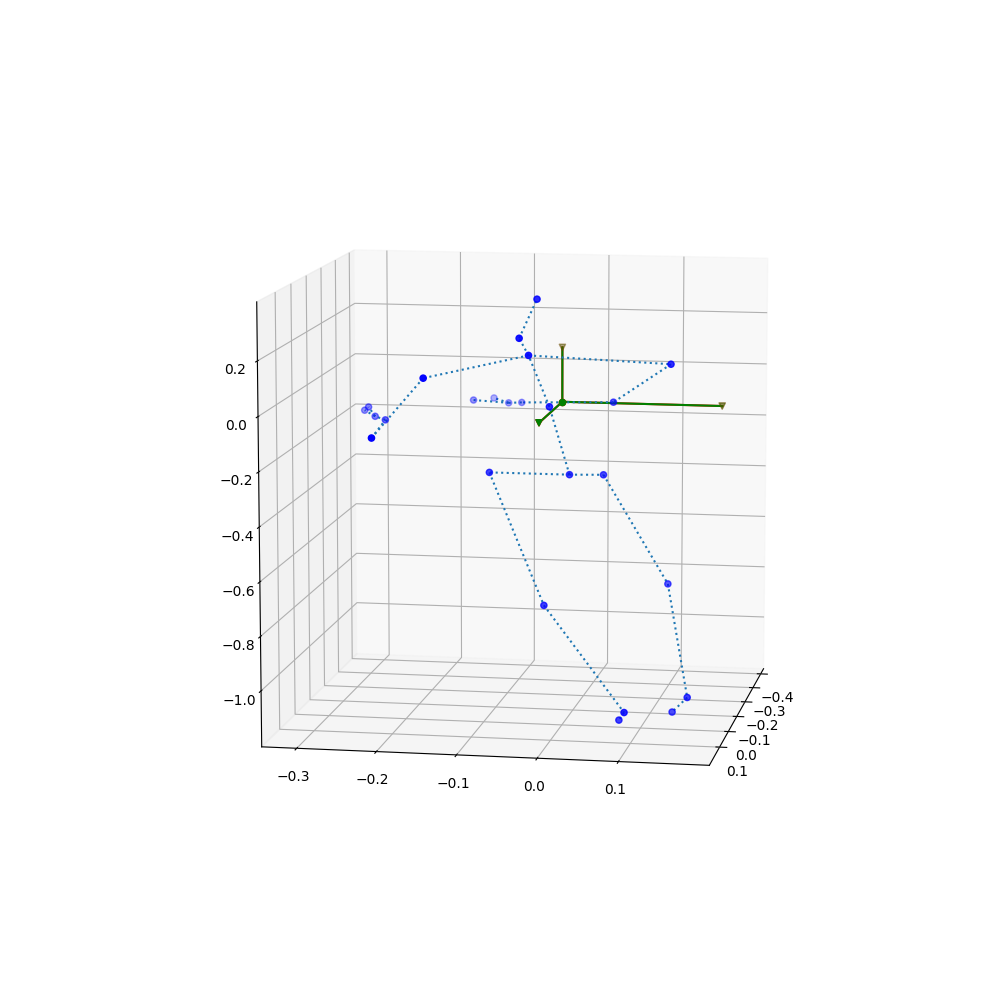

In [7]:
animateJointCoordinates(skeleton_aug.transpose(3, 2, 0, 1)[0], connexion_tuples)